# Week3授業課題 信用情報を分析しよう

## 課題の目的

- 実データに近いものの分析を行う
- データセットに対して自ら課題を設定できるようにする

## 信用情報

Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行う。

## 【問題１】コンペティション内容の把握

以下の観点に気をつけて、どのようなコンペティションなのかレポートする。

- このコンペティションでは何を予測するのか（目的変数は何か）
- 企業がこのコンペティションを開催することで得られるメリットは何か。
- データセットを見る前の段階で考えられる予測結果に影響し得ることは何か。

**<コンペティションの内容>**

1. コンペティションでは何を予測するのか（目的変数は何か）

  - 予測するのは、融資後に支払不能とならないと思われる新規融資先
  - 目的変数は、target（0：正常先、1：支払困難＝default先）


2. 企業がこのコンペティションを開催することで得られるメリットは何か。
  
  - 融資の原資が有限である中、リスク（貸倒に伴う融資元本の毀損）を抑えつつ、リターンを最大化したい。
  - 具体的には、相応の精度で貸倒率を予測できるならば、貸倒率に応じて融資金額、利率の水準を設定することができる。


3. データセットを見る前の段階で考えられる予測結果に影響し得ることは何か。
  
  - 資産保有状況（不動産の有無、預金残高など）=> 将来的な資産価値の毀損が少なく、高順位で担保設定できるならば、損失を抑制し得る
  - 収入の見通し（勤務先の業界、勤務先、役職など）
  - 自社以外からの借入有無、及びその返済状況 => 融資実行前に借入の弁済遅延が確認された場合、信用力の面で懸念が残る。
  - （データセットには含まれていないが、手に入るならば）Facebook等のSNS情報 => 交友関係、人物像の把握に有益な情報と思われる。

### カーネル
カーネルは自由に見て活用して良い。

＜参考カーネル＞

[Home Credit Default Risk Extensive EDA | Kaggle](https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda)

[HomeCreditRisk: Extensive EDA + Baseline 0.772 |Kaggle](https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772)

[HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle](https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp)

この他にも、カーネルの一覧ページから探して良い。

## 【問題２】データの概観

データの概観を見たことを元に、自分なりの課題・疑問を複数設定する。

- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す

コードと表・グラフだけではなく、結果に対する説明や考察も行うこと。

In [159]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import math

### （１）データセットの概要をつかむ

In [160]:
# データを読み込む
df = pd.read_csv("application_train.csv")

In [161]:
# データ先頭の５行
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### データ概要

- 307,511行、122列のデータセット
- データ型：float64(65), int64(41), object(16)

In [163]:
# 特徴量
columns = df.columns.values
columns

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# 基本統計量
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### データの欠損状況

In [204]:
# 欠損値を含む特徴量を抽出
columns_nan = df.columns.values[df.isnull().any()==True]

In [205]:
# 67の特徴量に欠損が含まれる
len(columns_nan)

67

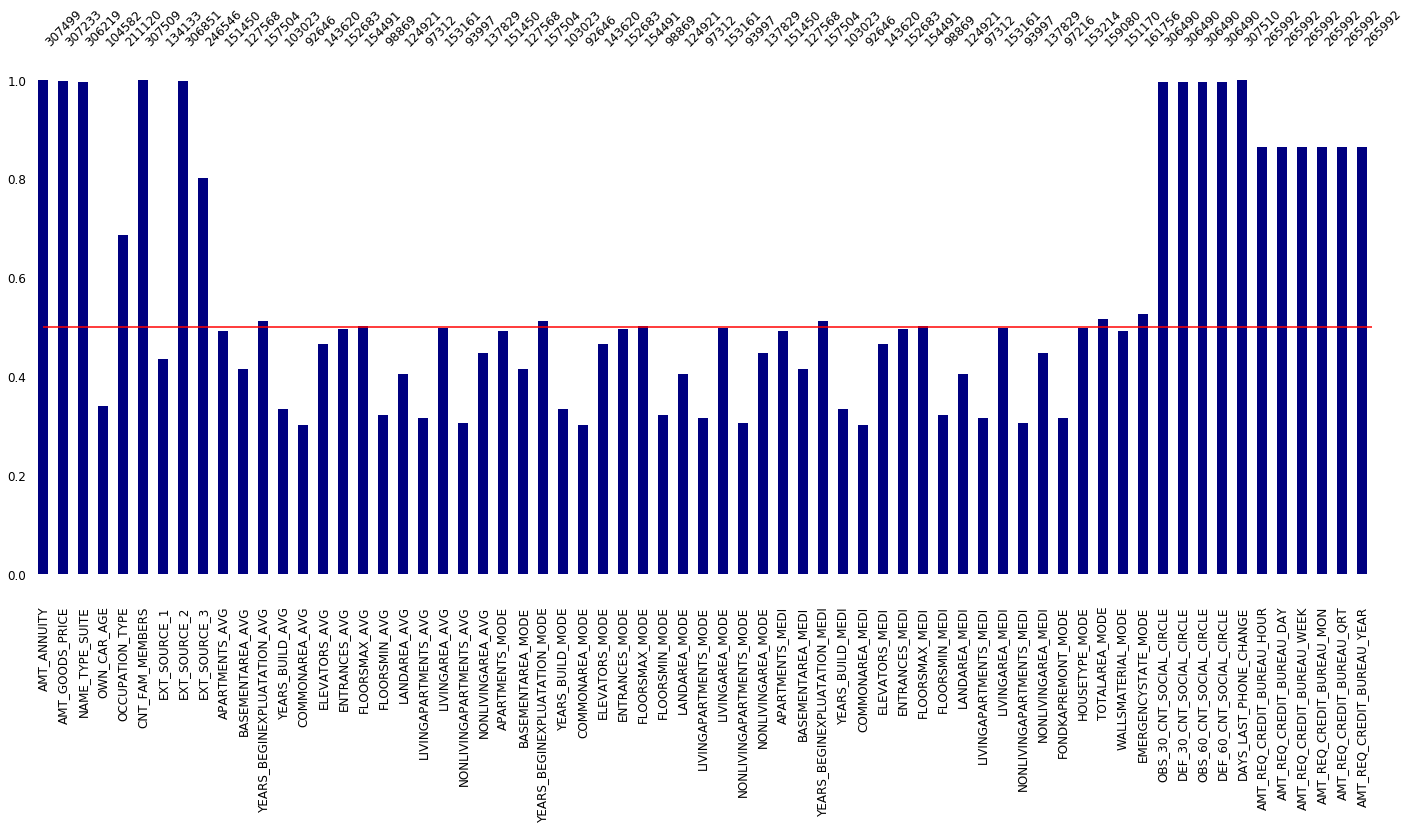

In [207]:
# 欠損値の割合を可視化する
msno.bar(df[columns_nan], color="navy", fontsize=12)
plt.hlines(y=0.5, xmin=0, xmax=len(columns_nan), colors="r"); # 境界線（欠損率0.5）

- 欠損割合が0.5を超える（上図において値が水平線を下回る）特徴量も多い。

In [102]:
# 各列の欠損値の割合を算出する
missing_value_ratio_list = [] # 各列の値の欠損率（欠損値の個数÷データ総数）を格納するリスト

for column in df.columns:    
    count_missing_value = df[column].isnull().sum() # 欠損値の個数をカウント
    count_row = len(df[column]) # データ個数をカウント
    missing_value_ratio = count_missing_value / count_row # 欠損率を計算
    missing_value_ratio_list.append(round(missing_value_ratio, 2))

df_missing_value = pd.DataFrame({"column_name": df.columns, "missing_value_ratio": missing_value_ratio_list})

# データ表示が途中で省略されないよう、行数をセット
pd.set_option("display.max_rows", len(df_missing_value))

In [105]:
# 欠損率が0.5を超える特徴量は34個
len(df_missing_value[df_missing_value["missing_value_ratio"] > 0.5]) 

34

#### データの欠損に関する考察

1. 車齢に関する欠損値の割合が高い。
    - 自家用車を所有していない場合は欠損値となる。
    - 「自家用車の保有状況が"貸倒率"に対して有意な差異を及ぼし得るか」は要検証事項。


2. 住宅関連情報に関する欠損値の割合が高い。
    - 原因としては、借家あるいは情報非開示のいずれかと考えられる）
    - 「住宅の保有状況が"貸倒率"に対して有意な差異を及ぼし得るか」は要検証事項。

#### TARGETのクラス別にデータを概観する

In [12]:
# 値をクラス別に分解する
df_normal = df[df["TARGET"]==0] # 正常先
df_default = df[df["TARGET"]==1] # 貸倒先

In [13]:
# データ件数
len(df_normal), len(df_default)

(282686, 24825)

In [14]:
# データ数の割合
normal_data_counts = round(len(df_normal) / len(df), 2)
default_data_counts = round(len(df_default) / len(df), 2)

normal_data_counts, default_data_counts

(0.92, 0.08)

- 正常先（TARGET=０）のデータ数の割合は約92%、貸倒先（TARGET=１）のデータ数の割合は約8%である。
- TARGET別で見た場合にはデータが不均衡であるため、以降の分析では、データの個数で単純比較するのではなく、正常先、貸倒先それぞれのデータ数を分母とした"割合"に基づいて比較するほうが望ましい。

#### 住宅関連情報

#### 平均値

In [100]:
# 住宅関連の特徴量を抽出
columns_home_avg = [column for column in columns if "AVG" in column]

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


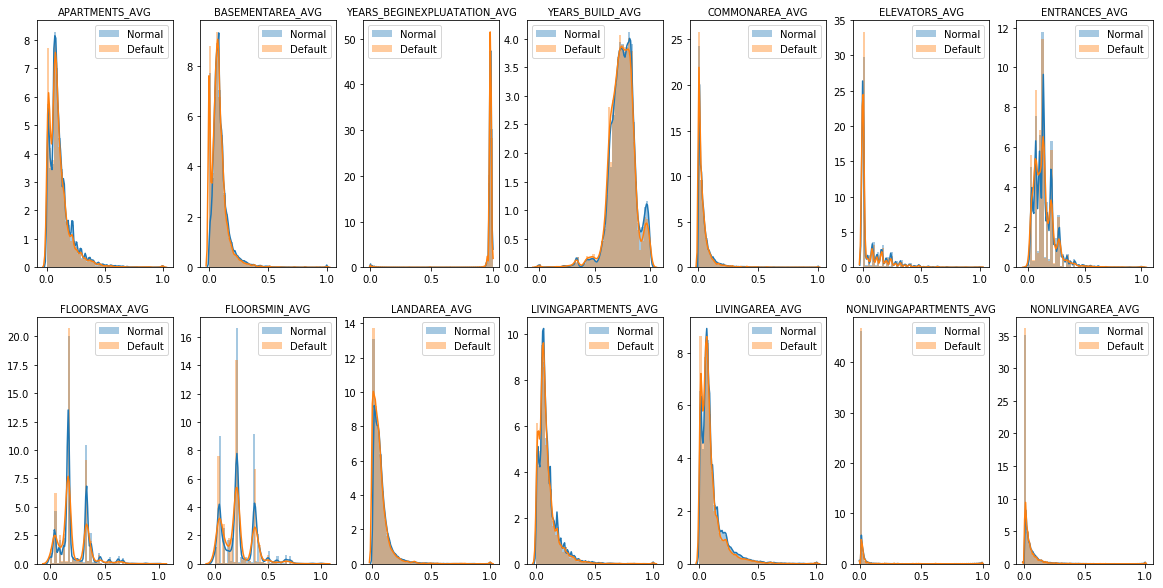

In [93]:
fig, ax = plt.subplots(2,7, figsize=(20, 10))

for i, column in enumerate(columns_home_avg):
    plt.subplot(2, 7, i+1)
    df_normal = df[column][df.TARGET.values == 0].dropna()
    df_default = df[column][df.TARGET.values == 1].dropna()
    
    sns.distplot(df_normal, label="Normal")
    sns.distplot(df_default, label="Default")
    plt.title(column, fontsize=10)
    plt.xlabel("")
    plt.legend()

- 正常先、貸倒先で住宅関連情報の分布に極端な違いは見られない。

#### 中央値

In [101]:
# 住宅関連の特徴量を抽出
columns_home_medi = [column for column in columns if "MEDI" in column]

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


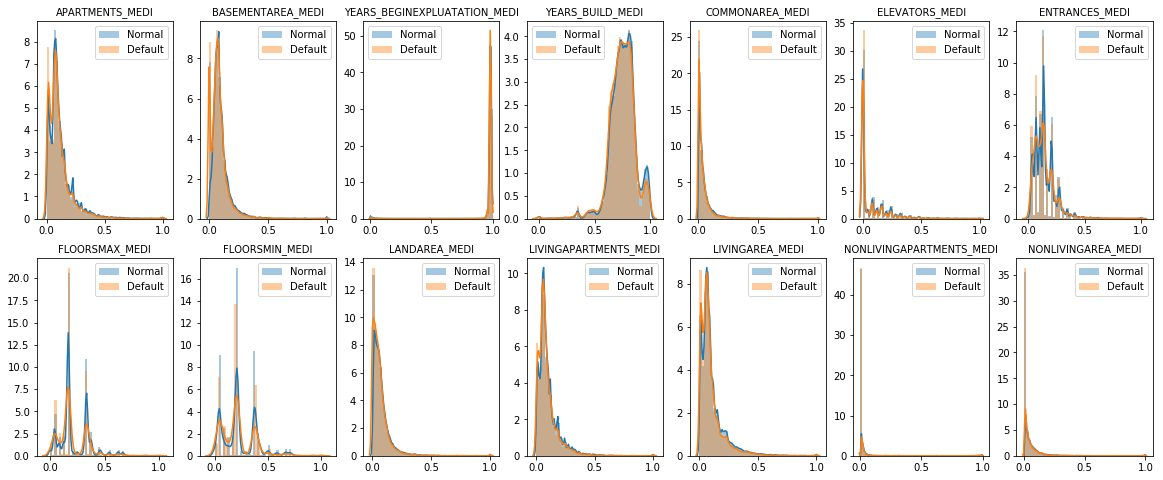

In [99]:
fig, ax = plt.subplots(2,7, figsize=(20, 8))

for i, column in enumerate(columns_home_medi):
    plt.subplot(2, 7, i+1)
    df_normal = df[column][df.TARGET.values == 0].dropna()
    df_default = df[column][df.TARGET.values == 1].dropna()
    
    sns.distplot(df_normal, label="Normal")
    sns.distplot(df_default, label="Default")
    plt.title(column, fontsize=10)
    plt.xlabel("")
    plt.legend()

- 正常先、貸倒先で住宅関連情報の分布に極端な違いは見られない。

## 【問題3】課題設定
データの概観を元に、自分なりの課題・疑問を複数設定する。

#### 仮説：住宅関連情報は、貸倒率の判断に影響しないと思われることから、以下の点について検証を進めたい。

1. 車両関連情報は貸倒率に影響するか？：収入や金銭消費パターン、翻っては返済能力に影響する特徴量と思われる。

2. 職業、職種は貸倒率に影響するか？：将来の返済能力に影響する特徴量と思われる。

3. 提出書類や外部情報が貸倒率に影響するか？：特に、外部情報は融資先当人から取得したものではない客観的指標として説明力が高いと思われる。

## 【問題4】データ探索

- 問題3で設定した課題・疑問を解決するためにデータ探索を進める。
- 過程で新しい疑問点などが生まれた場合は、追加する。

- 課題合格の条件
  - 表やグラフを合計15個以上出力すること。
  - それに対してマークダウンを使い考察を加えること。

#### 総論：ターゲットに対して有意な影響があると思われる特徴量は以下の通り。

- "EXT_SOURCE1"
- "EXT_SOURCE2"
- "EXT_SOURCE3"
- "DAYS_LAST_PHONE_CHANGE"

#### 検証１：年収（AMT_INCOME_TOTAL）が低いほど債務不履行となりやすい？（年収の分布に違いがあるのでは？）

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


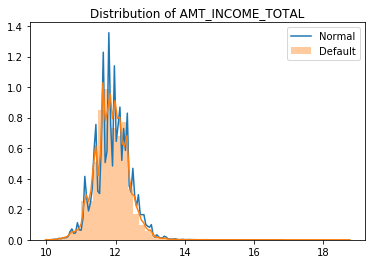

In [194]:
# 目的変数（TARGET：0 or 1）別に、年収の分布（ヒストグラム）を作成する
sns.distplot(np.log(df.AMT_INCOME_TOTAL[df["TARGET"]==0].dropna().values), hist=False, label="Normal")
sns.distplot(np.log(df.AMT_INCOME_TOTAL[df["TARGET"]==1].dropna().values), hist=True, label="Default")
plt.title("Distribution of AMT_INCOME_TOTAL")
plt.legend();

- 年収の分布に目立った差異は確認されない。

#### 検証２：年金（AMT_ANNUITY）に差はあるか？

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


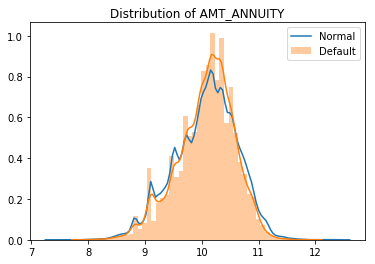

In [195]:
sns.distplot(np.log(df.AMT_ANNUITY[df["TARGET"]==0].dropna().values), hist=False, label="Normal")
sns.distplot(np.log(df.AMT_ANNUITY[df["TARGET"]==1].dropna().values), hist=True, label="Default")
plt.title("Distribution of AMT_ANNUITY")
plt.legend();

- 目立った差異は確認されない。

#### 検証３：ローン（AMT_CREDIT）に差はあるか？

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


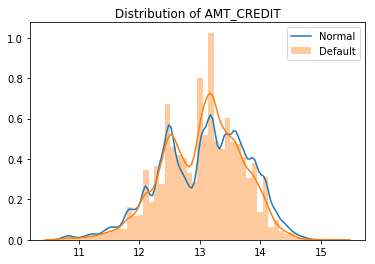

In [196]:
sns.distplot(np.log(df.AMT_CREDIT[df["TARGET"]==0].dropna().values), hist=False, label="Normal")
sns.distplot(np.log(df.AMT_CREDIT[df["TARGET"]==1].dropna().values), hist=True, label="Default")
plt.title("Distribution of AMT_CREDIT")
plt.legend();

- 中央値付近で貸倒先の比率が若干高いように見えるが、目立った差異はない。

#### 検証４：消費者金融の場合、ローンが提供された対象商品の価格（AMT_GOODS_PRICE）に差はあるか？

In [21]:
# NaNを1（対数変換した場合に0となる値）で補間する
df = df.fillna({'AMT_GOODS_PRICE': 1})

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


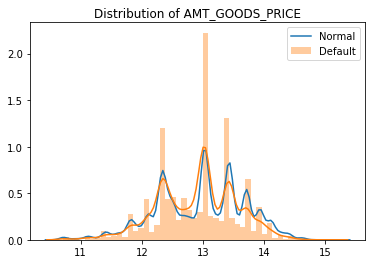

In [208]:
sns.distplot(np.log(df.AMT_GOODS_PRICE[df["TARGET"]==0].dropna().values), hist=False, label="Normal")
sns.distplot(np.log(df.AMT_GOODS_PRICE[df["TARGET"]==1].dropna().values), hist=True, label="Default")
plt.title("Distribution of AMT_GOODS_PRICE")
plt.legend();

- 目立った差異はない。

#### 検証５：職種（NAME_INCOME_TYPE）に差はあるか？

In [210]:
# ターゲット別に職種の割合を集計する
income_type_counts = (df.groupby(['TARGET'])['NAME_INCOME_TYPE']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('NAME_INCOME_TYPE'))

In [211]:
income_type_counts.TARGET[income_type_counts["TARGET"]==0] = "Normal"
income_type_counts.TARGET[income_type_counts["TARGET"]==1] = "Default"

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


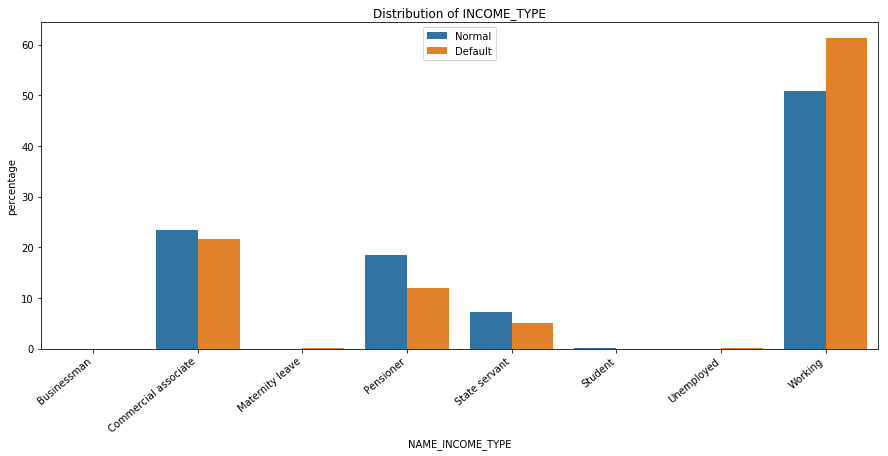

In [212]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x = "NAME_INCOME_TYPE", y="percentage", hue="TARGET", data=income_type_counts)
_ = plt.setp(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Distribution of INCOME_TYPE")
plt.legend(loc="best");

- 職種としては、正常先に比して貸倒先のほうがWorkingの割合が10%程度高い。
- 但し、いずれの職種も目立った差異は見られない。

#### 検証６：車齢（OWN_CAR_AGE）に差異はあるか？

In [25]:
# NaNを1（対数変換した場合に0となる値）で補間する
df = df.fillna({'OWN_CAR_AGE': 1})

In [129]:
# 値はmonthで考えるのが妥当（最大値91について、91日、あるいは91年とするのは現実的ではない）
np.unique(df.OWN_CAR_AGE.values)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 54., 55., 56., 57., 63., 64., 65., 69., 91.])

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


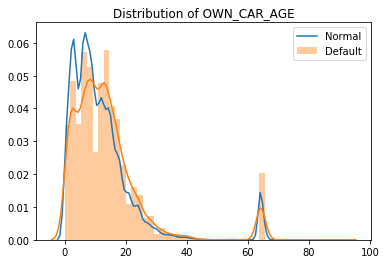

In [198]:
sns.distplot(df.OWN_CAR_AGE[df["TARGET"]==0].dropna().values, hist=False, label="Normal")
sns.distplot(df.OWN_CAR_AGE[df["TARGET"]==1].dropna().values, hist=True, label="Default")
plt.title("Distribution of OWN_CAR_AGE")
plt.legend();

- 正常先、貸倒先ともに、保有車両の車齢が若い。
- 正常先、貸倒先ともに、車齢の分布が２ヶ月以内の範囲に集中していることが分かる。
- 目立った差異は見られない。

#### 検証７：在住地域（REGION_RATING_CLIENT）に差異がある

In [215]:
# ターゲット別に在住地域の割合を集計する
region_counts = (df.groupby(['TARGET'])['REGION_RATING_CLIENT']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('REGION_RATING_CLIENT'))

In [216]:
region_counts.TARGET[region_counts["TARGET"]==0] = "Normal"
region_counts.TARGET[region_counts["TARGET"]==1] = "Default"

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


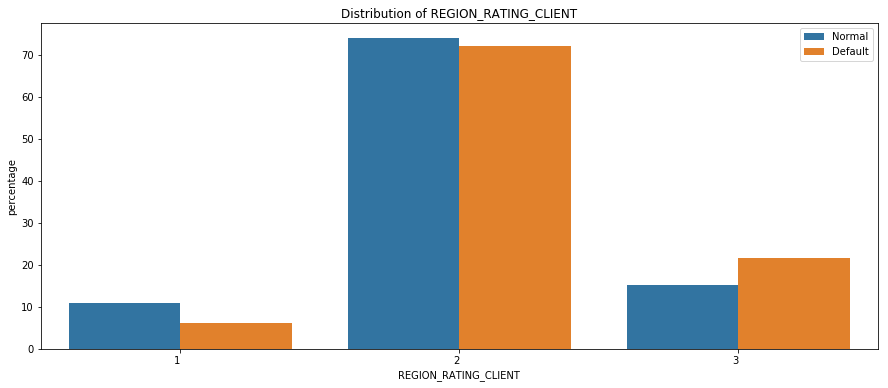

In [217]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x = "REGION_RATING_CLIENT", y="percentage", hue="TARGET", data=region_counts)
_ = plt.setp(ax.get_xticklabels(), ha="right")
plt.title("Distribution of REGION_RATING_CLIENT")
plt.legend();

- 目立った差異は見られない。

#### 検証８：地域人口（REGION_POPULATION_RELATIVE）に差異があるか？

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


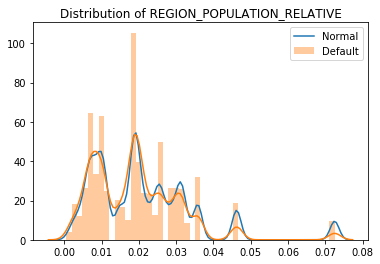

In [214]:
sns.distplot(df.REGION_POPULATION_RELATIVE[df["TARGET"]==0].dropna().values, hist=False, label="Normal")
sns.distplot(df.REGION_POPULATION_RELATIVE[df["TARGET"]==1].dropna().values, hist=True, label="Default")
plt.title("Distribution of REGION_POPULATION_RELATIVE")
plt.legend();

- 目立った差異は見られない。

#### 検証９：顧客の職業（OCCPATION_TYPE）に差異があるか？

In [219]:
# ターゲット別に職業の割合を集計する
occupation_counts = (df.groupby(['TARGET'])['OCCUPATION_TYPE']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('OCCUPATION_TYPE'))

In [220]:
occupation_counts.TARGET[occupation_counts["TARGET"]==0] = "Normal"
occupation_counts.TARGET[occupation_counts["TARGET"]==1] = "Default"

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


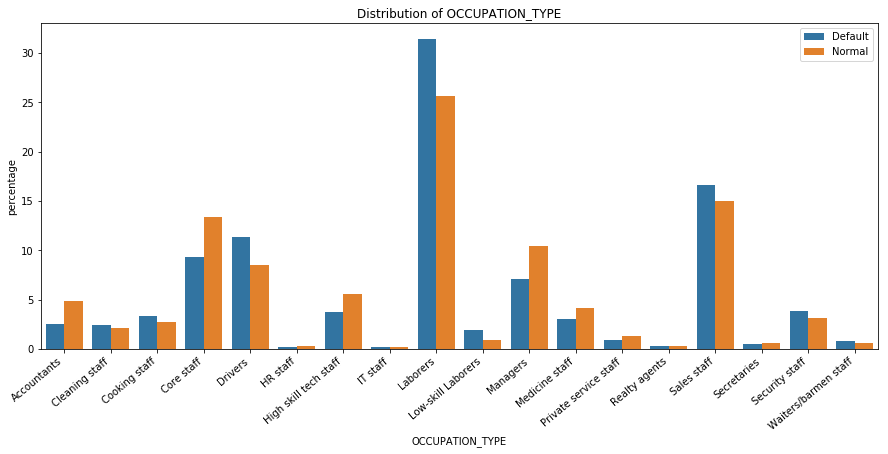

In [221]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x = "OCCUPATION_TYPE", y="percentage", hue="TARGET", data=occupation_counts)
_ = plt.setp(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Distribution of OCCUPATION_TYPE")
plt.legend();

- 正常先よりも貸倒先のほうが割合が高い職種：Accountants, Core staff, High skill tech staff, Managers, Medicine staff
- 最も大きな差異でも5%程度であり、職種別で目立った差異は見られない。

#### 検証１０：外部情報１（EXT_SOURCE_1）に差異がある

In [186]:
# NaNを1（対数変換した場合に0となる値）で補間する
df = df.fillna({'EXT_SOURCE_1': 0})

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


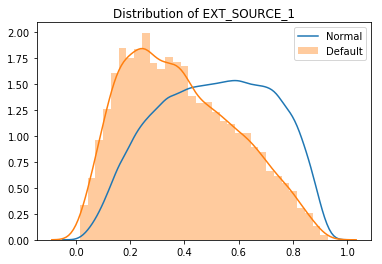

In [193]:
# 目的変数（TARGET：0 or 1）別に、年収の分布（ヒストグラム）を作成する
sns.distplot(df.EXT_SOURCE_1[df["TARGET"]==0].dropna().values, hist=False, label="Normal")
sns.distplot(df.EXT_SOURCE_1[df["TARGET"]==1].dropna().values, hist=True, label="Default")
plt.title("Distribution of EXT_SOURCE_1")
plt.legend();

- <font color="blue">**外部情報1については、目的変数のクラス間で有意な差異が見られる。**</font>
- 貸倒先は、EXT_SOURCE_1のスコアが相対的に低く、スコアが0.4より低い層の割合が高い。

#### 検証１１：外部情報２（EXT_SOURCE_2）に差異がある

In [32]:
# NaNを1（対数変換した場合に0となる値）で補間する
df = df.fillna({'EXT_SOURCE_2': 0})

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


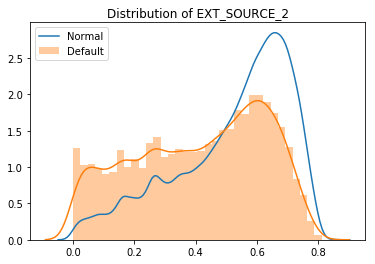

In [192]:
# 目的変数（TARGET：0 or 1）別に、ヒストグラムを作成する
sns.distplot(df.EXT_SOURCE_2[df["TARGET"]==0].dropna().values, hist=False, label="Normal")
sns.distplot(df.EXT_SOURCE_2[df["TARGET"]==1].dropna().values, hist=True, label="Default")
plt.title("Distribution of EXT_SOURCE_2")
plt.legend();

- <font color="blue">**外部情報2については、目的変数のクラス間で有意な差異が見られる。**</font>
- 貸倒先は、EXT_SOURCE_2のスコアが相対的に低く、スコアが0.5より低い層の割合が高い。

#### 検証１２：外部情報３（EXT_SOURCE_３）に差異がある

In [187]:
# NaNを1（対数変換した場合に0となる値）で補間する
df = df.fillna({'EXT_SOURCE_3': 0})

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


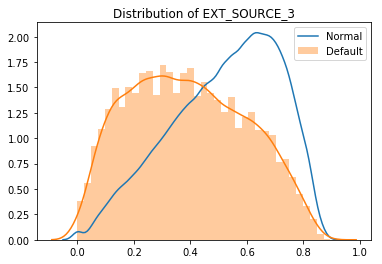

In [191]:
# 目的変数（TARGET：0 or 1）別に、ヒストグラムを作成する
sns.distplot(df.EXT_SOURCE_3[df["TARGET"]==0].dropna().values, hist=False, label="Normal")
sns.distplot(df.EXT_SOURCE_3[df["TARGET"]==1].dropna().values, hist=True, label="Default")
plt.title("Distribution of EXT_SOURCE_3")
plt.legend();

- <font color="blue">**外部情報３については、目的変数のクラス間で有意な差異が見られる。**</font>
- 貸倒先は、EXT_SOURCE_3のスコアが相対的に低く、スコアが0.4より低い層の割合が高い。

#### 検証１３：融資申し込みの何日前に携帯電話を変更したか（DAYS_LAST_PHONE_CHANGE）に差異がある

In [36]:
# NaNを1（対数変換した場合に0となる値）で補間する
df = df.fillna({'DAYS_LAST_PHONE_CHANGE': 0})

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


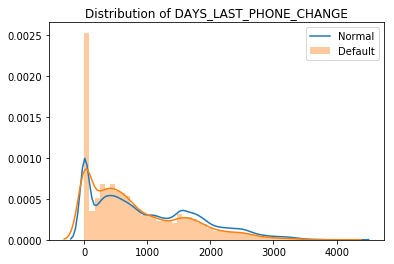

In [37]:
# 目的変数（TARGET：0 or 1）別に、ヒストグラムを作成する
sns.distplot(-df.DAYS_LAST_PHONE_CHANGE.values[df["TARGET"]==0], hist=False, label="Normal")
sns.distplot(-df.DAYS_LAST_PHONE_CHANGE.values[df["TARGET"]==1], hist=True, label="Default")
plt.title("Distribution of DAYS_LAST_PHONE_CHANGE")
plt.legend();

- 貸倒先のほうが携帯電話を変更してから日が浅い（分布が全体的に左寄り）に見え、影響を与える特徴量に加えても良いと思われる。
- 携帯電話を新たに契約することで、既存の交友関係に影響が及ばないようにする意図はあるかもしれない。

#### 検証１４：融資申し込みの何日前に現職に就いたか（DAYS_EMPLOYED）に差異がある

In [186]:
# 外れ値（365243）は除外する必要がある
np.unique(df.DAYS_EMPLOYED.values)

array([-17912, -17583, -17546, ...,     -1,      0, 365243])

In [187]:
df.DAYS_EMPLOYED[df.DAYS_EMPLOYED == 365243] = 0

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [188]:
# NaNを1（対数変換した場合に0となる値）で補間する
df = df.fillna({'DAYS_EMPLOYED': 0})

In [189]:
DAYS_EMPLOYED_MIN = np.min(df.DAYS_EMPLOYED.values)

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


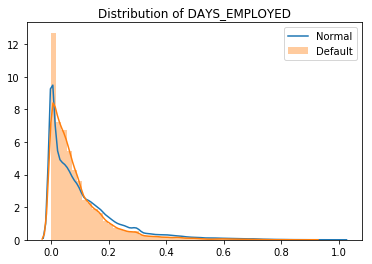

In [190]:
# 目的変数（TARGET：0 or 1）別に、ヒストグラムを作成する
sns.distplot(df.DAYS_EMPLOYED[df["TARGET"]==0].dropna().values/DAYS_EMPLOYED_MIN, hist=False, label="Normal")
sns.distplot(df.DAYS_EMPLOYED[df["TARGET"]==1].dropna().values/DAYS_EMPLOYED_MIN, hist=True, label="Default")
plt.title("Distribution of DAYS_EMPLOYED")
plt.legend();

- 目立った差異は見られない。

#### 検証１５：提出書類（FLAG_DOCUMENT）に差異が見られるか？

In [223]:
documents = [column for column in df.columns.values if "DOCUMENT" in column]

In [224]:
df_documents = df[documents]
df_documents["TARGET"] = df.TARGET.values

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [225]:
# 相関係数
df_corr = df_documents.corr()

In [226]:
# TARGETとの相関係数を抽出
round(df_corr["TARGET"], 3)

FLAG_DOCUMENT_2     0.005
FLAG_DOCUMENT_3     0.044
FLAG_DOCUMENT_4    -0.003
FLAG_DOCUMENT_5    -0.000
FLAG_DOCUMENT_6    -0.029
FLAG_DOCUMENT_7    -0.002
FLAG_DOCUMENT_8    -0.008
FLAG_DOCUMENT_9    -0.004
FLAG_DOCUMENT_10   -0.001
FLAG_DOCUMENT_11   -0.004
FLAG_DOCUMENT_12   -0.001
FLAG_DOCUMENT_13   -0.012
FLAG_DOCUMENT_14   -0.009
FLAG_DOCUMENT_15   -0.007
FLAG_DOCUMENT_16   -0.012
FLAG_DOCUMENT_17   -0.003
FLAG_DOCUMENT_18   -0.008
FLAG_DOCUMENT_19   -0.001
FLAG_DOCUMENT_20    0.000
FLAG_DOCUMENT_21    0.004
TARGET              1.000
Name: TARGET, dtype: float64

- TARGETとの正の相関が最も高いのは「FLAG_DOCUMENTS_3」で、相関係数は0.044である。（実質的には無相関とも言えるかもしれない）

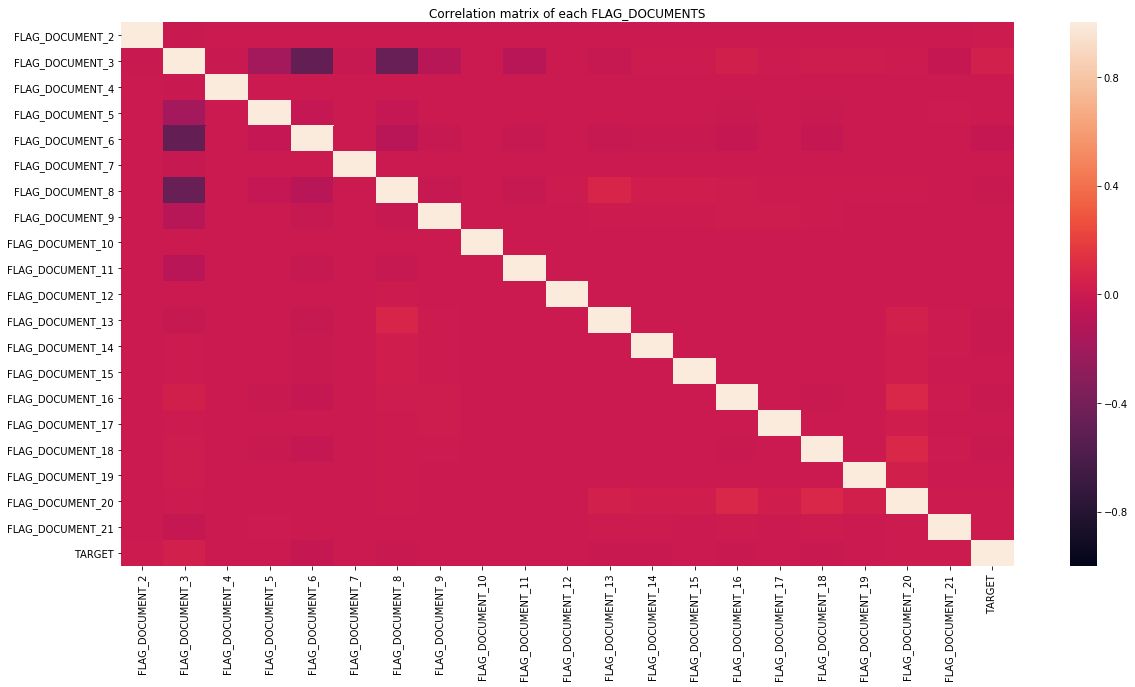

In [232]:
# 相関係数のheatmapを作成する
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, vmax=1, vmin=-1)
plt.title("Correlation matrix of each FLAG_DOCUMENTS");

- FLAG_DOCUMENTS_3について、一部のFLAG_DOCUMENTSと負の相関が見られる。

In [228]:
# FLAG_DOCUMENTS_3の値の分布
np.unique(df["FLAG_DOCUMENT_3"].values, return_counts=True)

(array([0, 1]), array([ 89171, 218340]))

- FLAG_DOCUMENTS_3は、1（提出済）の値の割合が大きい。

In [229]:
round(df_corr["FLAG_DOCUMENT_3"], 2)

FLAG_DOCUMENT_2    -0.01
FLAG_DOCUMENT_3     1.00
FLAG_DOCUMENT_4    -0.01
FLAG_DOCUMENT_5    -0.19
FLAG_DOCUMENT_6    -0.49
FLAG_DOCUMENT_7    -0.02
FLAG_DOCUMENT_8    -0.47
FLAG_DOCUMENT_9    -0.10
FLAG_DOCUMENT_10   -0.01
FLAG_DOCUMENT_11   -0.09
FLAG_DOCUMENT_12   -0.00
FLAG_DOCUMENT_13   -0.02
FLAG_DOCUMENT_14    0.00
FLAG_DOCUMENT_15    0.00
FLAG_DOCUMENT_16    0.03
FLAG_DOCUMENT_17    0.00
FLAG_DOCUMENT_18    0.01
FLAG_DOCUMENT_19    0.01
FLAG_DOCUMENT_20    0.01
FLAG_DOCUMENT_21   -0.03
TARGET              0.04
Name: FLAG_DOCUMENT_3, dtype: float64

Text(0.5,1,'Correlation matrix of each FLAG_DOCUMENTS')

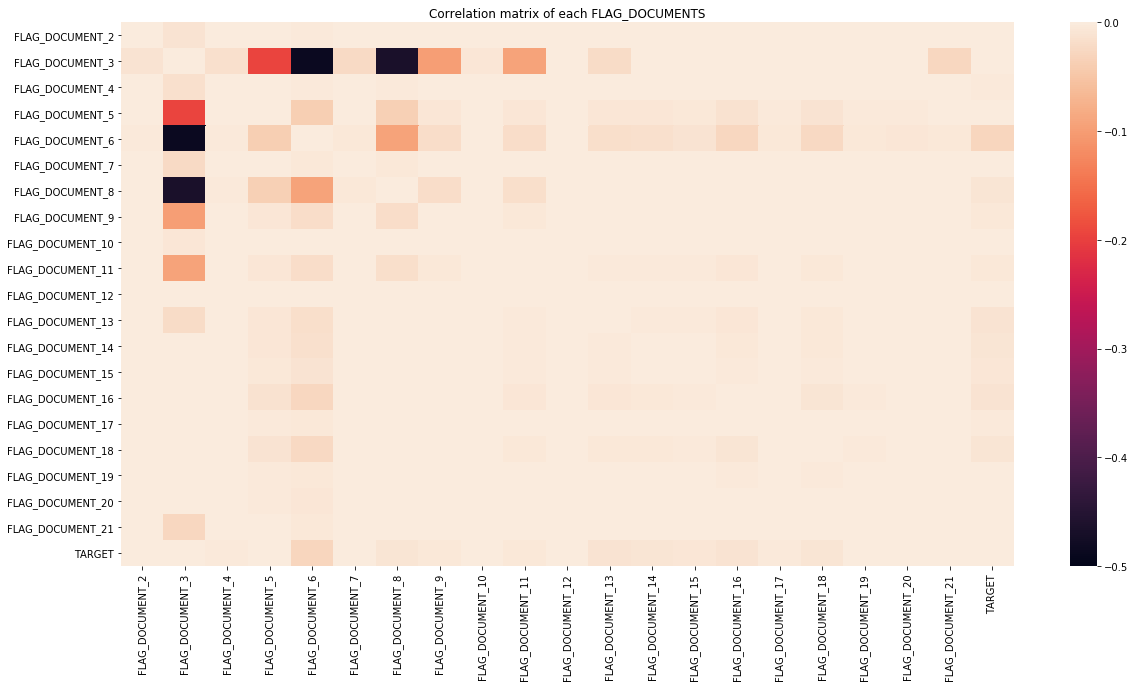

In [230]:
# 相関係数のheatmapを作成する
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, vmax=-0, vmin=-0.5);
plt.title("Correlation matrix of each FLAG_DOCUMENTS")

- 特にFLAG_DOCUMENTS_3と負の相関が高いのは、FLAG_DOCUMENTS_6, 8である。
- FLAG_DOCUMENTS_3とTARGETの間で0.04程度の正の相関が見られること合わせると、＜FLAG_DOCUMENTS_8, 11のいずれかを提出できる顧客は相対的に貸倒率が低い＞可能性がある。

#### 検証１６：FLAG_DOCUMENT_3とEXT_SOURCE_2, 3の関係性に違いは見られるか？

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


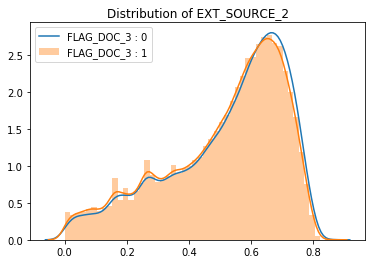

In [183]:
sns.distplot(df.EXT_SOURCE_2[df["FLAG_DOCUMENT_3"]==0].dropna().values, hist=False, label="FLAG_DOC_3 : 0")
sns.distplot(df.EXT_SOURCE_2[df["FLAG_DOCUMENT_3"]==1].dropna().values, hist=True, label="FLAG_DOC_3 : 1")
plt.title("Distribution of EXT_SOURCE_2")
plt.legend();

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


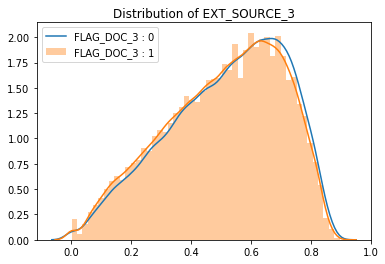

In [182]:
# 目的変数（TARGET：0 or 1）別に、ヒストグラムを作成する
sns.distplot(df.EXT_SOURCE_3[df["FLAG_DOCUMENT_3"]==0].dropna().values, hist=False, label="FLAG_DOC_3 : 0")
sns.distplot(df.EXT_SOURCE_3[df["FLAG_DOCUMENT_3"]==1].dropna().values, hist=True, label="FLAG_DOC_3 : 1")
plt.title("Distribution of EXT_SOURCE_3")
plt.legend();

- 特に大きな差異は見られない。

#### 検証１７：FLAG_DOCUMENTS_8とEXT_SOURCE2, 3の関係に違いは見られるか？

In [181]:
# FLAG_DOCUMENT_8の値のみ抽出する
np.unique(df.FLAG_DOCUMENT_8.values, return_counts=True)

(array([0, 1]), array([282487,  25024]))

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


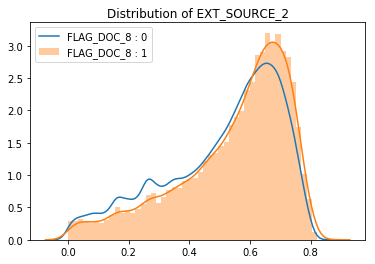

In [181]:
# EXT_SOURCE_2
sns.distplot(df.EXT_SOURCE_2[df["FLAG_DOCUMENT_8"]==0].dropna().values, hist=False, label="FLAG_DOC_8 : 0")
sns.distplot(df.EXT_SOURCE_2[df["FLAG_DOCUMENT_8"]==1].dropna().values, hist=True, label="FLAG_DOC_8 : 1")
plt.title("Distribution of EXT_SOURCE_2")
plt.legend();

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


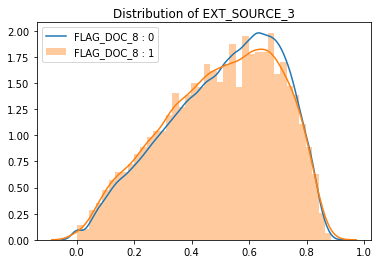

In [180]:
# EXT_SOURCE_3
sns.distplot(df.EXT_SOURCE_3[df["FLAG_DOCUMENT_8"]==0].dropna().values, hist=False, label="FLAG_DOC_8 : 0")
sns.distplot(df.EXT_SOURCE_3[df["FLAG_DOCUMENT_8"]==1].dropna().values, hist=True, label="FLAG_DOC_8 : 1")
plt.title("Distribution of EXT_SOURCE_3")
plt.legend();

- FLAG_DOCUMENT_8が0の場合、EXT_SOURCE2の値の分布が全体的に左寄り（低い値を取る）であることが確認された。

#### 検証１８：FLAG_DOCUMENTS_11とEXT_SOURCE2, 3の関係に違いは見られるか？

In [108]:
# FLAG_DOCUMENT_11の値のみ抽出する
np.unique(df.FLAG_DOCUMENT_11.values, return_counts=True)

(array([0, 1]), array([306308,   1203]))

- ほぼ全ての値が"０"である

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


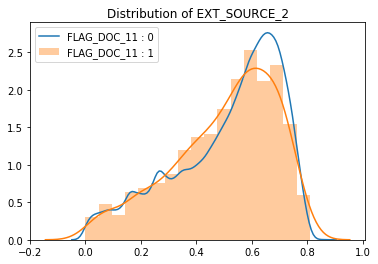

In [179]:
# EXT_SOURCE_2
sns.distplot(df.EXT_SOURCE_2[df["FLAG_DOCUMENT_11"]==0].dropna().values, hist=False, label="FLAG_DOC_11 : 0")
sns.distplot(df.EXT_SOURCE_2[df["FLAG_DOCUMENT_11"]==1].dropna().values, hist=True, label="FLAG_DOC_11 : 1")
plt.title("Distribution of EXT_SOURCE_2")
plt.legend();

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


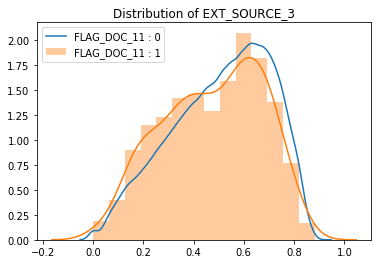

In [178]:
# EXT_SOURCE_3
sns.distplot(df.EXT_SOURCE_3[df["FLAG_DOCUMENT_11"]==0].dropna().values, hist=False, label="FLAG_DOC_11 : 0")
sns.distplot(df.EXT_SOURCE_3[df["FLAG_DOCUMENT_11"]==1].dropna().values, hist=True, label="FLAG_DOC_11 : 1")
plt.title("Distribution of EXT_SOURCE_3")
plt.legend();

### Take away

データ分析の要点は以下の通りと理解した。

- データ分析の目的は、次の２点。
    1. 「目的変数に対して、どのような特徴量がどの程度影響し得るか」を理解すること。
    2. なぜその特徴量が影響を及ぼすのか、因果関係に関する仮説構築、検証を行うこと。


- 実践すべきこと
    1. データが不均衡か否かを確認する：目的変数の各クラスのデータ数が過大、過小ではないか？
    2. ドメイン知識を補間すること：目的変数と特徴量間の因果関係に関する仮説構築に必要
    3. 欠損値の割合を確認し、ドメイン知識等に基づいてどのように補間すべきか（あるいはdropすべきか）考える
    4. 目的変数のクラス別にデータを可視化して、分布の形状、度数がどのように異なるか確認する
    5. 特徴量間の相関関係を把握すること：相関が高いからと言って、必ずしも因果関係があるわけではないことに注意
    6. データに適切な変換を加えること：標準化、対数化が挙げられる。外れ値の影響を抑える。
    7. 定性データ、定量データは扱いが異なること：定性データの場合、one-hot vectorとして扱う必要がある


- 避けるべきことは以下の通り。
    1. 意味もなくいたずらにデータを加工すること。
    2. 大量のデータを一度に可視化しようとすること：最初は特徴量を絞り、少しずつ特徴量を追加しながら解釈を深める、あるいは仮説を構築すると良い。